In [ ]:
import tensorflow as tf

# Display the version
print(tf.__version__)	

# other imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.math import confusion_matrix
from sklearn.metrics import classification_report



2.8.2


In [ ]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


170508288/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


#Normalizing images by dividing pixels by 255

In [ ]:
# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()


#Reshaping images so as to fit them to convolution

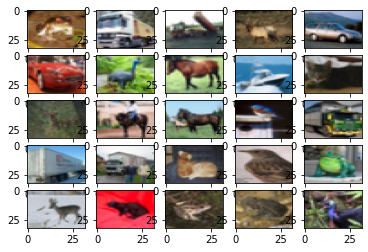

In [ ]:
# visualize data by plotting images
fig, ax = plt.subplots(5, 5)
k = 0

for i in range(5):
	for j in range(5):
		ax[i][j].imshow(x_train[k], aspect='auto')
		k += 1

plt.show()


#Building a CNN Architecture

In [ ]:
# number of classes
K = len(set(y_train))

# calculate total number of classes
# for output layer
print("number of classes:", K)

# Build the model using the functional API
# input layer
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

# model description
model.summary()


number of classes: 10
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16

In [ ]:
# Compile
model.compile(optimizer='adam',
			loss='sparse_categorical_crossentropy',
			metrics=['accuracy'])


#Executing the model for appropriate number of epochs

In [ ]:
# Fit
r = model.fit(
x_train, y_train, validation_data=(x_test, y_test), epochs=50)


Epoch 1/50
1563/1563 [==============================] - 21s 7ms/step - loss: 1.2654 - accuracy: 0.5617 - val_loss: 1.0166 - val_accuracy: 0.6455
Epoch 2/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8360 - accuracy: 0.7098 - val_loss: 0.9684 - val_accuracy: 0.6842
Epoch 3/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6879 - accuracy: 0.7623 - val_loss: 0.7374 - val_accuracy: 0.7535
Epoch 4/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5782 - accuracy: 0.8006 - val_loss: 0.7052 - val_accuracy: 0.7605
Epoch 5/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4959 - accuracy: 0.8293 - val_loss: 0.6192 - val_accuracy: 0.7910
Epoch 6/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4258 - accuracy: 0.8535 - val_loss: 0.5850 - val_accuracy: 0.8092
Epoch 7/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.3599 - accuracy: 0.8762 - val_loss: 0.5815 - val_ac

In [ ]:
# Fit with data augmentation
# Note: if you run this AFTER calling
# the previous model.fit()
# it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

r = model.fit(train_generator, validation_data=(x_test, y_test),
			steps_per_epoch=steps_per_epoch, epochs=50)


Epoch 1/50
1562/1562 [==============================] - 29s 19ms/step - loss: 0.5483 - accuracy: 0.8262 - val_loss: 0.4686 - val_accuracy: 0.8500
Epoch 2/50
1562/1562 [==============================] - 29s 19ms/step - loss: 0.4355 - accuracy: 0.8557 - val_loss: 0.4940 - val_accuracy: 0.8488
Epoch 3/50
1562/1562 [==============================] - 28s 18ms/step - loss: 0.4034 - accuracy: 0.8679 - val_loss: 0.4661 - val_accuracy: 0.8517
Epoch 4/50
1562/1562 [==============================] - 29s 19ms/step - loss: 0.3766 - accuracy: 0.8726 - val_loss: 0.4757 - val_accuracy: 0.8481
Epoch 5/50
1562/1562 [==============================] - 29s 18ms/step - loss: 0.3600 - accuracy: 0.8795 - val_loss: 0.4627 - val_accuracy: 0.8506
Epoch 6/50
1562/1562 [==============================] - 29s 18ms/step - loss: 0.3476 - accuracy: 0.8831 - val_loss: 0.4426 - val_accuracy: 0.8587
Epoch 7/50
1562/1562 [==============================] - 29s 18ms/step - loss: 0.3357 - accuracy: 0.8873 - val_loss: 0.4422 -

#Depicting accuracy vs. val_accuracy on line chart.

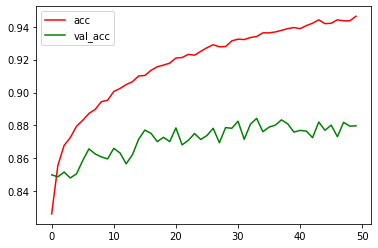

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()


#Depicting loss vs. val_loss on line chart.

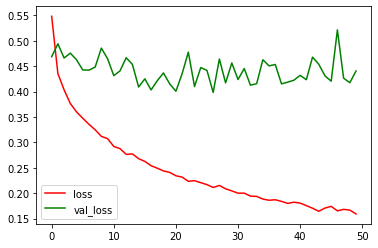

In [ ]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss', color='red')
plt.plot(r.history['val_loss'], label='val_loss', color='green')
plt.legend()


#Generating predictions on test_data.

Original label is cat and predicted label is cat


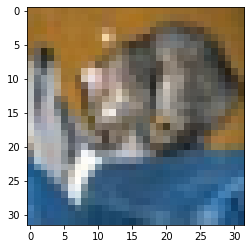

In [ ]:
# label mapping

labels = '''airplane automobile bird cat deerdog frog horseship truck'''.split()

# select the image from our test dataset
image_number = 0

# display the image
plt.imshow(x_test[image_number])

# load the image in an array
n = np.array(x_test[image_number])

# reshape it
p = n.reshape(1, 32, 32, 3)

# pass in the network for prediction and
# save the predicted label
predicted_label = labels[model.predict(p).argmax()]

# load the original label
original_label = labels[y_test[image_number]]

# display the result
print("Original label is {} and predicted label is {}".format(
	original_label, predicted_label))


Original label is airplane and predicted label is airplane


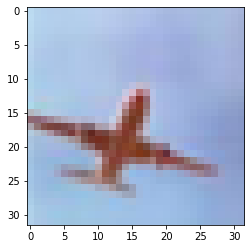

In [ ]:
# label mapping

labels = '''airplane automobile bird cat deerdog frog horseship truck'''.split()

# select the image from our test dataset
image_number = 5722

# display the image
plt.imshow(x_test[image_number])

# load the image in an array
n = np.array(x_test[image_number])

# reshape it
p = n.reshape(1, 32, 32, 3)

# pass in the network for prediction and
# save the predicted label
predicted_label = labels[model.predict(p).argmax()]

# load the original label
original_label = labels[y_test[image_number]]

# display the result
print("Original label is {} and predicted label is {}".format(
	original_label, predicted_label))


#Computing Confusion matrix and classification report.

In [ ]:
y_pred = model.predict(x_test)
label_for_first_test_image = np.argmax(y_pred[0])
print(label_for_first_test_image)
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

3
[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9, 3, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 8, 4, 9, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9, 7, 6, 9, 8, 9, 6, 8, 8, 7, 3, 3, 6, 7, 5, 6, 3, 6, 2, 1, 2, 3, 7, 0, 6, 8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 7, 2, 7, 2, 4, 8, 9, 0, 3, 8, 6, 4, 3, 6, 0, 0, 7, 4, 5, 6, 3, 1, 1, 3, 6, 8, 7, 6, 0, 2, 2, 1, 3, 0, 4, 2, 7, 8, 3, 1, 2, 8, 0, 8, 3, 5, 2, 4, 1, 8, 9, 1, 2, 9, 7, 2, 1, 6, 5, 6, 3, 8, 7, 6, 2, 5, 2, 8, 9, 6, 0, 0, 5, 2, 9, 2, 4, 2, 1, 6, 6, 0, 2, 8, 4, 5, 0, 9, 0, 9, 8, 9, 9, 3, 7, 5, 0, 0, 5, 2, 2, 3, 8, 2, 3, 3, 8, 5, 8, 0, 1, 7, 2, 8, 8, 7, 8, 5, 1, 8, 7, 1, 3, 0, 5, 7, 9, 7, 4, 5, 9, 8, 0, 7, 9, 8, 2, 7, 6, 9, 4, 3, 9, 4, 4, 7, 6, 5, 1, 5, 8, 8, 0, 4, 0, 5, 5, 1, 1, 1, 9, 0, 3, 1, 8, 2, 2, 5, 3, 9, 9, 4, 0, 3, 0, 0, 9, 8, 1, 5, 7, 0, 8, 2, 4, 7, 0, 2, 3, 6, 3, 8, 5, 0, 2, 4, 3, 9, 8, 6, 1, 9, 9, 1, 0, 7, 9, 1, 2, 6, 9, 3, 2, 6, 0, 0, 6, 6, 6, 3, 2, 6, 1, 9, 2, 9, 2, 8, 6, 0, 0, 9, 0, 7, 7, 5, 5, 3, 5, 2, 3, 4, 1, 7, 5, 4, 6, 1, 9, 3

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred_labels)

In [ ]:
print(conf_mat)

tf.Tensor(
[[926   9  14   6   3   0   2   1  29  10]
 [  5 956   1   3   1   0   2   0   6  26]
 [ 30   7 863  32  18  15  14   9   6   6]
 [ 15   4  42 792  19  55  33  16  10  14]
 [ 15   1  56  45 812  12  25  21   6   7]
 [ 10   2  28 117  17 789   9  18   4   6]
 [  8   7  36  42   5   3 889   2   5   3]
 [ 12   0  12  24  10  12   3 913   1  13]
 [ 31  14   2   3   1   0   1   0 933  15]
 [ 16  42   1   4   0   0   0   1  11 925]], shape=(10, 10), dtype=int32)


In [ ]:
print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1000
           1       0.92      0.96      0.94      1000
           2       0.82      0.86      0.84      1000
           3       0.74      0.79      0.77      1000
           4       0.92      0.81      0.86      1000
           5       0.89      0.79      0.84      1000
           6       0.91      0.89      0.90      1000
           7       0.93      0.91      0.92      1000
           8       0.92      0.93      0.93      1000
           9       0.90      0.93      0.91      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

